# Kuramoto Model

In this example, we will simulate the Kuramoto model, which is a model of coupled oscillators. The Kuramoto model is defined by the following system of differential equations:
$$ \frac{d \theta_i}{dt} = \omega_i + \zeta_i + \frac{K}{N} \sum_{j=1}^N A_{ij} sin(\theta_j(t - \tau_{ij}) - \theta_i(t)) + h_i(t)$$
here $\theta_i$ is the phase of oscillator $i$, $\omega_i$ is the natural frequency of oscillator $i$, $\zeta_i$ is the noise term, $K$ is the global coupling strength, $A$ is the coupling matrix, $\tau_{ij}$ is the phase lag between oscillator $i$ and $j$, and $h_i(t)$ is the external input to oscillator $i$.

In [10]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    import sys
    !{sys.executable} -m pip install matplotlib
    import matplotlib.pyplot as plt
    
import numpy as np

# Let's import the Kuramoto model
from neurolib.models.kuramoto import KuramotoModel
from neurolib.models.kuramoto.loadDefaultParams import loadDefaultParams

# Some useful functions are provided here
import neurolib.utils.functions as func

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

np.random.seed(42)

# Single node simulation 

Here we will simulate a signal node with no noise. We then cap the phase values to be between 0 and 2*pi. We also willo plot the phase values over time.

In [12]:
model = KuramotoModel()
model.params['duration'] = 10
model.run()

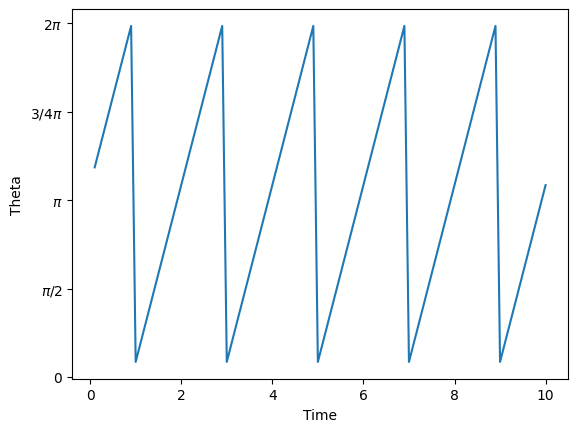

In [13]:
theta = model['theta'].T
theta_capped = np.mod(theta, 2*np.pi) # cap theta to [0, 2*pi]

plt.plot(model.t, theta_capped)
plt.xlabel("Time")
plt.ylabel("Theta")
plt.yticks(np.arange(0, 2*np.pi+0.1, np.pi/2), [ r"$0$", r"$\pi/2$", r"$\pi$", r"$3/4\pi$", r"$2\pi$",])# modify y-axis ticks to be in multiples of pi
plt.show()

# Network simulation

Here we simulate networks of oscillators. We will simulate a network of 8 oscillators with a global coupling strength 2. We will also plot the phase values over time.

In [14]:
# loading default parameters
params = loadDefaultParams()
# setting the coupling matrix
params.duration = 0.01*1000
params.N = 8
params.k = 2
params.Cmat = np.ones((params.N, params.N))
params.lengthMat = np.zeros((params.N, params.N))
params.omega = np.random.normal(loc=np.pi, scale=np.pi, size=(params.N,))
params.theta_init = np.random.uniform(low=0, high=2*np.pi, size=(params.N, 1))
params.theta_ou = np.zeros((params.N,))
params.sigma_ou = 0.0

In [15]:
network_model = KuramotoModel(params=params)
network_model.run()

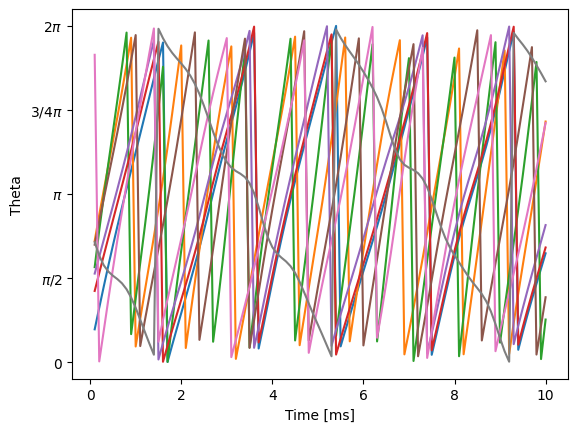

In [16]:
theta = network_model['theta'].T
# cap the phase to be between 0 and 2pi
theta_capped = np.mod(theta, 2*np.pi)

plt.plot(network_model.t, theta_capped)
plt.xlabel("Time [ms]")
plt.ylabel("Theta")
plt.yticks(np.arange(0, 2*np.pi+0.1, np.pi/2), [ r"$0$", r"$\pi/2$", r"$\pi$", r"$3/4\pi$", r"$2\pi$",])# modify y-axis ticks to be in multiples of pi
plt.show()

We can see that there is no synchronization between nodes. This happened because the nodes do not really have strong connection with each others. Now we will try to increase global coupling to see if synchronization occurs.

In [17]:
params.k = 8

network_model = KuramotoModel(params=params)
network_model.run()

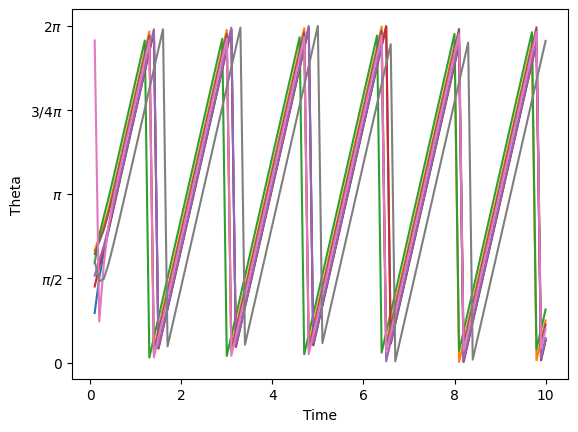

In [18]:
theta = network_model['theta'].T
theta_capped = np.mod(theta, 2*np.pi)

plt.plot(network_model.t, theta_capped)
plt.xlabel("Time")
plt.ylabel("Theta")
plt.yticks(np.arange(0, 2*np.pi+0.1, np.pi/2), [ r"$0$", r"$\pi/2$", r"$\pi$", r"$3/4\pi$", r"$2\pi$",])# modify y-axis ticks to be in multiples of pi
plt.show()

Increasing global coupling seems to increase synchronization although there is some oscillators that are not synchronized. Additionally